<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>
<h2 align='center'> La Máquina Alba </h2>

<H3 align='center'> Tarea/Taller 2 </H3>
<hr style="height:2px;border:none"/>



# Temas

* Regresión Lineal
* Regularización
* Selección de Características
* Reducción de Dimensionalidad


# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Los equipos deben ser inscritos antes del 10 de Noviembre.
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 




> * **Video:** Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

# Fechas

> * Defensas: 26 de Noviembre, horario de clases.
> * Fecha de entrega de vídeo: 27 de Noviembre 23:59 Hrs. (1 días después de encuentro).
> * Fecha de entrega de Jupyter (notebook): 26 de Noviembre 08:00 (se pueden hacer actualizaciones hasta el 27 de Noviembre 23:59 Hrs.). 


# Instrucciones

La tarea se divide en dos secciones:



> **1. Pregunta de Investigación**. Para esta parte, los autores deben elegir una hipótesis de investigación y diseñar un procedimiento experimental que permita reunir evidencia en contra o a favor de la misma. Es legítimo tomar una posición *a-priori* en base a lo que han aprendido en el curso, pero es importante analizar críticamente los resultados sin descartar hipótesis alternativas. 

> La metodología debe incluir al menos 3 datasets, de los cuales al menos 2 deben ser reales. Es deseable también que incluyan experimentos controlados sobre dataset sintéticos o semi-sintéticos no triviales diseñados por ustedes. Por ejemplo, para demostrar que un método logra ignorar variables irrelevantes se podrían crear variables "fake" manualmente. Experimentos de este último tipo que se basen en un dataset real contarán como realizados sobre "dataset reales".

> Si no es relevante para la pregunta de investigación y en honor al tiempo, no es necesario llevar a cabo un análisis exploratorio detallado sobre cada dataset utilizado.

>  **2. Desafío Kaggle**. Para esta parte, los autores enfrentarán un desafío en la plataforma Kaggle y serán calificados en base a su posición en el tablero de resultados y el puntaje obtenido.


# Parte 1. Pregunta de Investigación

> **12. Reducción de Dimensionalidad**: Combinando el modelo lineal de regresión con PCA perdemos en términos de interpretabilidad pero mejoramos significativamente el error de predicción. 

# Problema 1

El Banco Santander quiere predecir tempranamente la insatisfacción de sus clientes antes que abandonden el banco, por lo que se dispone de un conjunto de datos asociados a cada usuario para entrenar un modelo supervisado. Puede encontrar el desafío aquí: [https://www.kaggle.com/c/santander-customer-satisfaction/overview](https://www.kaggle.com/c/santander-customer-satisfaction/overview).

## Exploratorio

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [ ]:
print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/clases-II-2021/Machine-Learning/datasets/taller02/"#Esta es la ruta

name = 'train.csv' 

Mounting your Google Drive ...
Mounted at /content/drive


In [ ]:
data = pd.read_csv(path+name,encoding='latin-1', index_col = 0)
data = data.dropna()
data = data.sample(n=10000,replace=True)
data.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39052,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
133225,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32.85,16.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45988.980000,0
25547,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119025.240000,0
19988,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66645.390000,0
64768,2,24,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,230.19,139.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44004.120000,0


In [ ]:
data = data.dropna()
data = data.drop_duplicates()
data.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39052,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
133225,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,32.85,16.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45988.980000,0
25547,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119025.240000,0
19988,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66645.390000,0
64768,2,24,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,230.19,139.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44004.120000,0


## El Regresor Lineal

```
# This is formatted as code
```



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

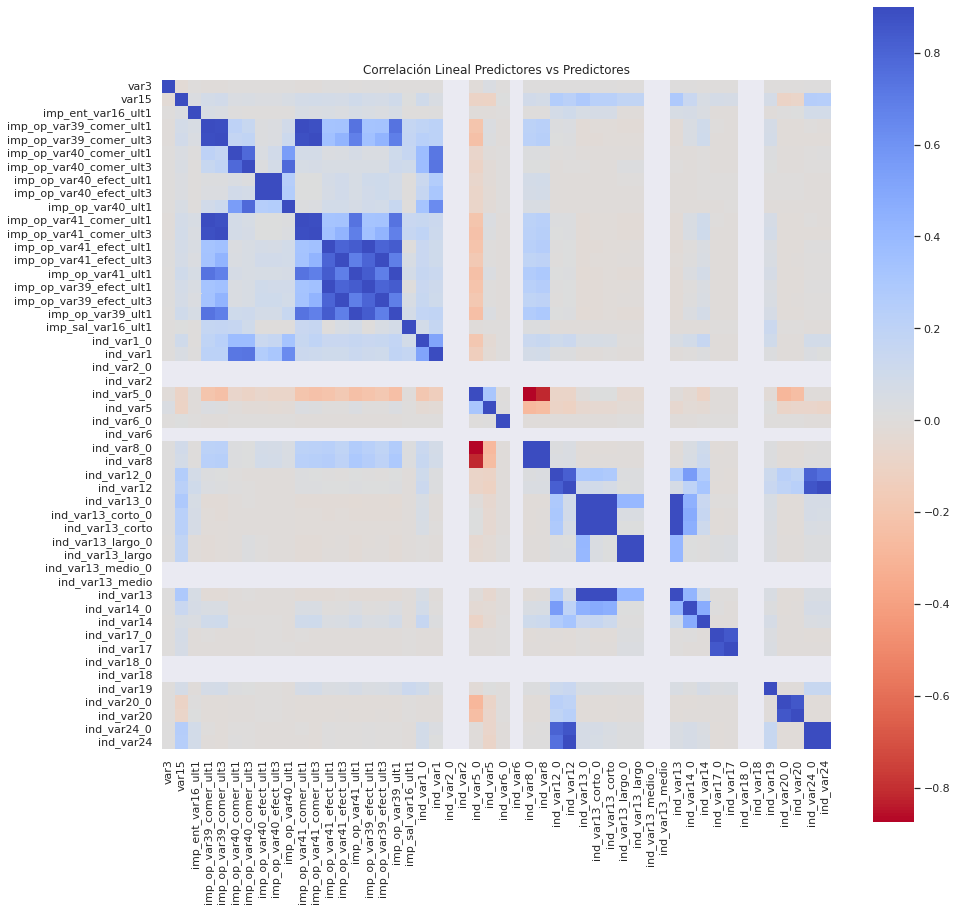

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

predictor_names = data.columns[:-1]
n_show = min(len(predictor_names),50)

corrmat = data[predictor_names[:n_show]].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="coolwarm_r")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

In [ ]:
#Se utilizan las componentes proyectadas
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns[:-1]]
y = data.loc[:, ['TARGET']]

#Se normaliza con Standard Scaler
X = StandardScaler().fit_transform(X)

#Se normaliza con LabelEncoder
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
y = encoded

#Se crean los conjuntos de entrenamiento y test desde los conjuntos definidos anteriormente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 2)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, y)

y_predict_train_clf = clf.predict(X_train)
y_predict_test_clf = clf.predict(X_test)

print('Accuracy Score sobre train_set: ', accuracy_score(y_train, y_predict_train_clf))
print('Accuracy Score sobre test_set: ', accuracy_score(y_test, y_predict_test_clf)) 

Accuracy Score sobre train_set:  0.9608165953243333
Accuracy Score sobre test_set:  0.9585561497326203


## Principal Component Analysis en el Regresor Lineal




In [ ]:
X = data.loc[:, data.columns[:-1]]
y = data.loc[:, ['TARGET']]

#Se normaliza con Standard Scaler
X = StandardScaler().fit_transform(X)

columns=[]
for i in range(50): 
    columns.append('PC'+str(i+1))

pca = PCA(n_components=50) #Modelo, se tomarán 50 n-componentes, es decir, se tomarán 50 variables para reducir la dimensión
principalComponents = pca.fit_transform(X) #fit del modelo

principalDataframe = pd.DataFrame(data = principalComponents, columns = columns)
principalDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-2.622759,-1.520761,-0.159556,0.178796,-0.217932,1.329619,0.215907,-0.115320,0.307787,1.830187,-0.638338,0.065164,-0.731020,1.235563,-2.157775,1.039055,-0.327043,0.511828,0.165298,-0.097814,-0.014879,0.938957,-0.863950,0.213900,0.035553,-0.197399,-0.124987,0.030989,-0.016463,-0.163548,0.146609,-0.061508,0.312367,0.062395,0.105612,-0.039799,0.436600,0.253928,-0.094967,-0.192390,-0.289154,-0.017990,0.067483,-0.008627,0.023815,0.007718,0.038208,-0.156902,-0.028393,0.145010
1,-1.446352,-0.569639,0.083163,0.077656,0.121237,-0.511517,-0.012974,0.250295,-0.334221,-1.210931,0.521066,-0.006769,0.565180,-1.342262,0.269664,0.368769,-0.103954,-0.379363,0.251621,-0.395426,-0.035201,-0.099159,-0.008665,0.545471,0.208174,0.095448,0.035335,-0.140732,0.181666,-0.067743,0.115593,-0.104995,0.223975,-0.115199,0.424098,-0.071677,0.248238,-0.067482,0.051102,0.249348,-0.055795,0.142847,0.312658,0.036152,-0.029661,-0.060925,0.273597,-0.032654,0.037932,0.026731
2,-1.955727,-0.852259,-0.013512,0.040633,0.044896,-0.261042,0.002686,0.166627,-0.157995,-0.876420,0.383263,0.036346,0.506867,-1.451605,0.615107,-0.420357,0.050813,-0.095047,-0.031933,-0.166124,-0.020226,0.058645,0.145897,-0.244835,-0.384378,0.076653,0.213504,-0.175504,0.256842,-0.059097,-0.069720,-0.031286,0.025632,-0.003860,-0.089162,-0.006812,-0.093486,-0.015945,0.098020,0.011687,0.121629,0.116497,0.058966,0.133400,0.069926,-0.023850,0.020402,-0.037041,-0.079062,0.038506
3,-1.810792,-0.741525,0.000638,0.047400,0.076819,-0.341408,0.004321,0.193437,-0.236091,-1.011896,0.448516,0.030533,0.554229,-1.575633,0.323864,-0.189457,-0.029637,-0.141571,0.085427,-0.307597,-0.029939,0.290790,-0.077974,-0.060111,-0.328905,0.096165,0.171850,-0.116565,0.182243,-0.065030,0.058782,-0.128790,0.213270,-0.070412,0.208387,-0.057231,0.021288,0.103666,0.100428,0.007982,0.053381,0.054290,0.120732,0.177346,0.076871,0.107100,0.061639,-0.019587,-0.096325,0.027253
4,1.781691,-1.362619,0.127199,-0.435746,0.172409,-1.078905,0.029014,0.697422,-1.222906,-5.755071,1.916535,-0.297944,-1.101786,4.015794,-0.356720,-2.617694,0.358185,0.882678,0.354476,1.056193,0.282936,0.758770,-0.995468,-1.826520,-1.073216,0.018560,0.484465,-0.217861,-0.120002,0.098400,-0.109715,-0.211839,0.552382,-0.095535,0.494707,0.126748,-0.166995,0.142696,0.020339,0.200658,-0.981059,-1.202778,-2.133771,-1.445132,-0.165357,-0.362031,-0.482280,0.485287,1.144096,0.101939


In [ ]:
y = y.reset_index()

df_reducido = pd.concat([principalDataframe, y],axis = 1)
df_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,ID,TARGET
0,-2.622759,-1.520761,-0.159556,0.178796,-0.217932,1.329619,0.215907,-0.115320,0.307787,1.830187,-0.638338,0.065164,-0.731020,1.235563,-2.157775,1.039055,-0.327043,0.511828,0.165298,-0.097814,-0.014879,0.938957,-0.863950,0.213900,0.035553,-0.197399,-0.124987,0.030989,-0.016463,-0.163548,0.146609,-0.061508,0.312367,0.062395,0.105612,-0.039799,0.436600,0.253928,-0.094967,-0.192390,-0.289154,-0.017990,0.067483,-0.008627,0.023815,0.007718,0.038208,-0.156902,-0.028393,0.145010,39052,0
1,-1.446352,-0.569639,0.083163,0.077656,0.121237,-0.511517,-0.012974,0.250295,-0.334221,-1.210931,0.521066,-0.006769,0.565180,-1.342262,0.269664,0.368769,-0.103954,-0.379363,0.251621,-0.395426,-0.035201,-0.099159,-0.008665,0.545471,0.208174,0.095448,0.035335,-0.140732,0.181666,-0.067743,0.115593,-0.104995,0.223975,-0.115199,0.424098,-0.071677,0.248238,-0.067482,0.051102,0.249348,-0.055795,0.142847,0.312658,0.036152,-0.029661,-0.060925,0.273597,-0.032654,0.037932,0.026731,133225,0
2,-1.955727,-0.852259,-0.013512,0.040633,0.044896,-0.261042,0.002686,0.166627,-0.157995,-0.876420,0.383263,0.036346,0.506867,-1.451605,0.615107,-0.420357,0.050813,-0.095047,-0.031933,-0.166124,-0.020226,0.058645,0.145897,-0.244835,-0.384378,0.076653,0.213504,-0.175504,0.256842,-0.059097,-0.069720,-0.031286,0.025632,-0.003860,-0.089162,-0.006812,-0.093486,-0.015945,0.098020,0.011687,0.121629,0.116497,0.058966,0.133400,0.069926,-0.023850,0.020402,-0.037041,-0.079062,0.038506,25547,0
3,-1.810792,-0.741525,0.000638,0.047400,0.076819,-0.341408,0.004321,0.193437,-0.236091,-1.011896,0.448516,0.030533,0.554229,-1.575633,0.323864,-0.189457,-0.029637,-0.141571,0.085427,-0.307597,-0.029939,0.290790,-0.077974,-0.060111,-0.328905,0.096165,0.171850,-0.116565,0.182243,-0.065030,0.058782,-0.128790,0.213270,-0.070412,0.208387,-0.057231,0.021288,0.103666,0.100428,0.007982,0.053381,0.054290,0.120732,0.177346,0.076871,0.107100,0.061639,-0.019587,-0.096325,0.027253,19988,0
4,1.781691,-1.362619,0.127199,-0.435746,0.172409,-1.078905,0.029014,0.697422,-1.222906,-5.755071,1.916535,-0.297944,-1.101786,4.015794,-0.356720,-2.617694,0.358185,0.882678,0.354476,1.056193,0.282936,0.758770,-0.995468,-1.826520,-1.073216,0.018560,0.484465,-0.217861,-0.120002,0.098400,-0.109715,-0.211839,0.552382,-0.095535,0.494707,0.126748,-0.166995,0.142696,0.020339,0.200658,-0.981059,-1.202778,-2.133771,-1.445132,-0.165357,-0.362031,-0.482280,0.485287,1.144096,0.101939,64768,0


In [ ]:
#Se utilizan las componentes proyectadas
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

X = df_reducido[columns]
Y = df_reducido['TARGET']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y)
Y = encoded

#Se crean los conjuntos de entrenamiento y test desde los conjuntos definidos anteriormente
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, Y)

Y_predict_train_pca = clf.predict(X_train)
Y_predict_test_pca = clf.predict(X_test)

print('Accuracy Score sobre train_set: ', accuracy_score(Y_train, Y_predict_train_pca))
print('Accuracy Score sobre test_set: ', accuracy_score(Y_test, Y_predict_test_pca)) 

Accuracy Score sobre train_set:  0.9609812314784326
Accuracy Score sobre test_set:  0.9585561497326203


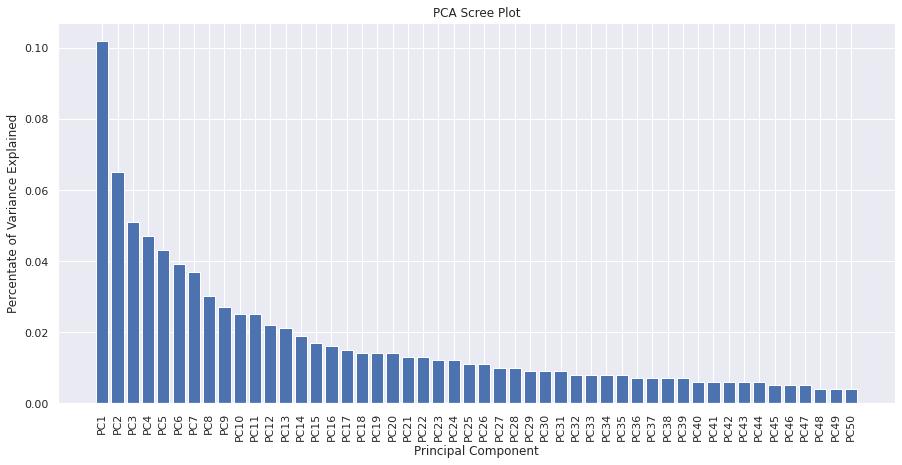

In [ ]:
#Varianzas por n-componentes
percent_variance = np.round(pca.explained_variance_ratio_, decimals =3)

plt.figure(figsize=(15,7))
plt.bar(x= range(1,51), height=percent_variance, tick_label=columns)
plt.xticks(x= range(1,51), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

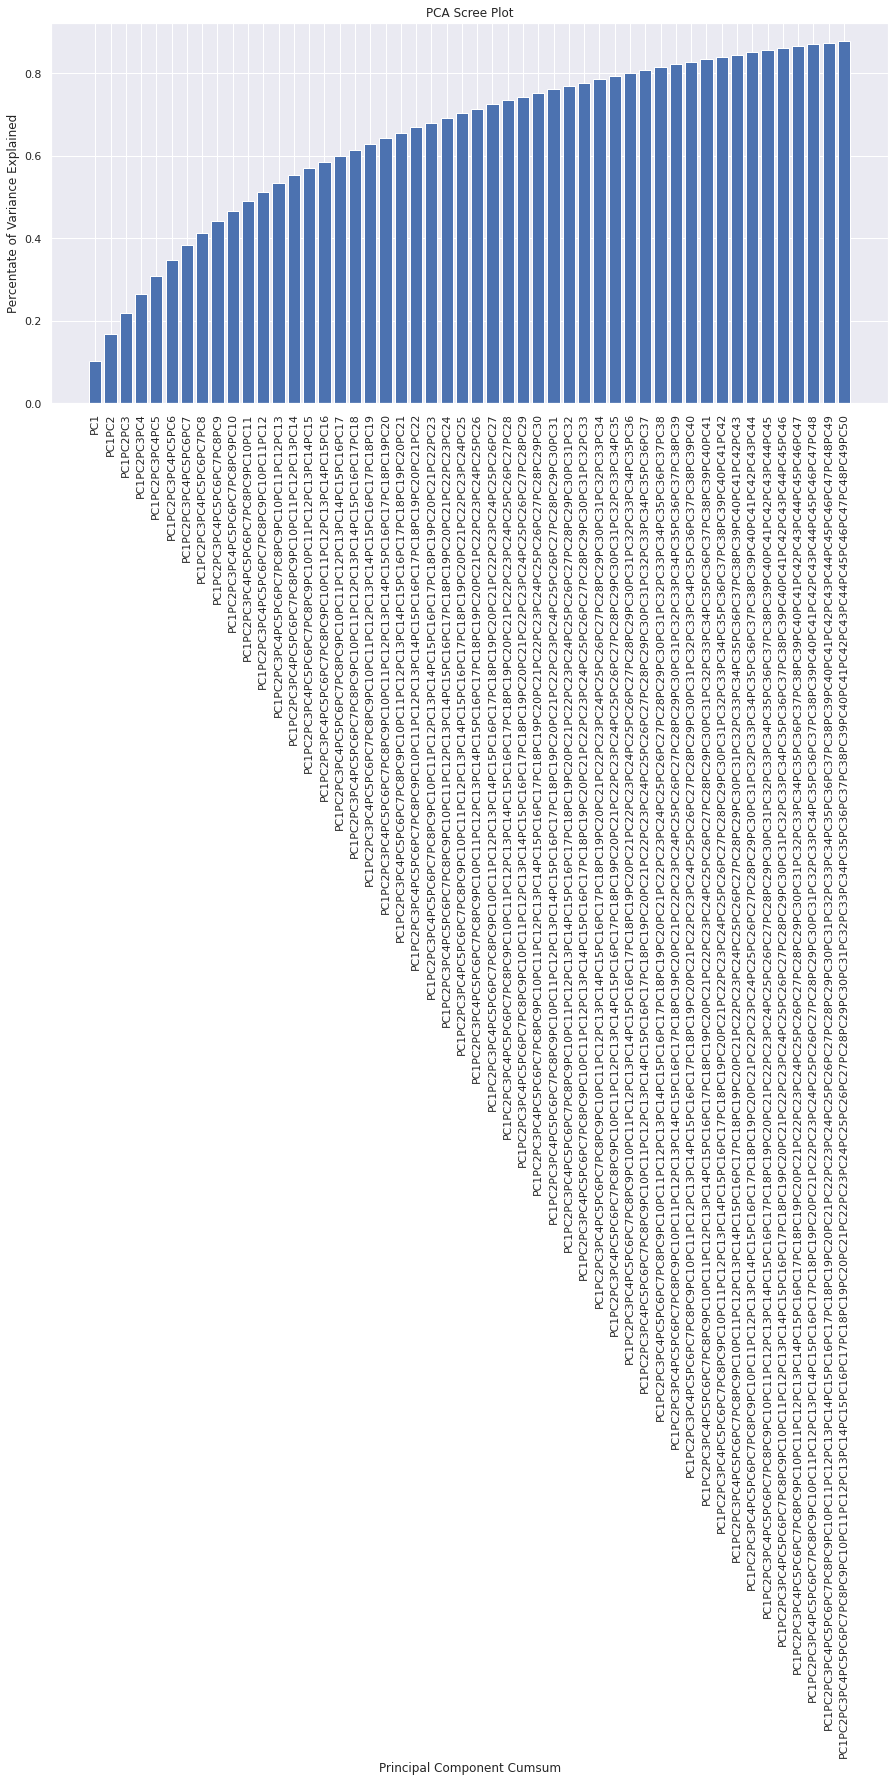

In [ ]:
columns=[]
aux=''
for i in range(50): 
  aux+='PC'+str(i+1)
  columns.append(aux)

# Gráfico de Varianza acumulada entre las n-componentes
percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(15,7))
plt.bar(x= range(1,51), height=percent_variance_cum, tick_label=columns)
plt.xticks(x= range(1,51), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

## Comparación

In [ ]:
pd.concat([summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_predict_test_clf})),summary_metrics(pd.DataFrame(data={'y':Y_test, 'yhat':Y_predict_test_pca}))], keys=['LinReg model', 'LinRed model + PCA'])

,,accuracy,recall,precision,fscore
LinReg model,0,0.9586,0.5193,0.7577,0.5267
LinRed model + PCA,0,0.9586,0.5078,0.8128,0.5050


# Problema 2

El objetivo del siguiente conjunto de datos dispuesto en `sklearn` tiene como objetivo reconocer números a partir de imágenes de números manuscritos.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Exploratorio

In [ ]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
np.unique(digits_dict["target"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0,4


In [ ]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,

In [ ]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

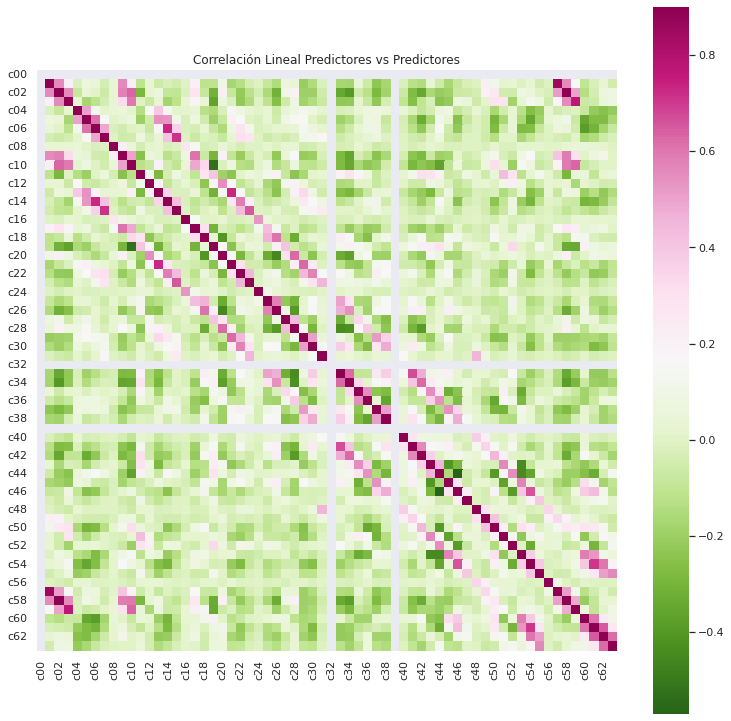

In [ ]:
predictor_names = digits.columns[:64]
n_show = min(len(predictor_names),70)

corrmat = digits[predictor_names[:n_show]].corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax, cmap='PiYG_r')
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

In [ ]:
targets_count = []

for i in range(len(np.unique(digits['target'].values))):
    targets_count.append(tuple([i,digits[digits['target']==i].shape[0]]))

print(f"Cantidad de datos asociados a cada clase: {targets_count}")

Cantidad de datos asociados a cada clase: [(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)]


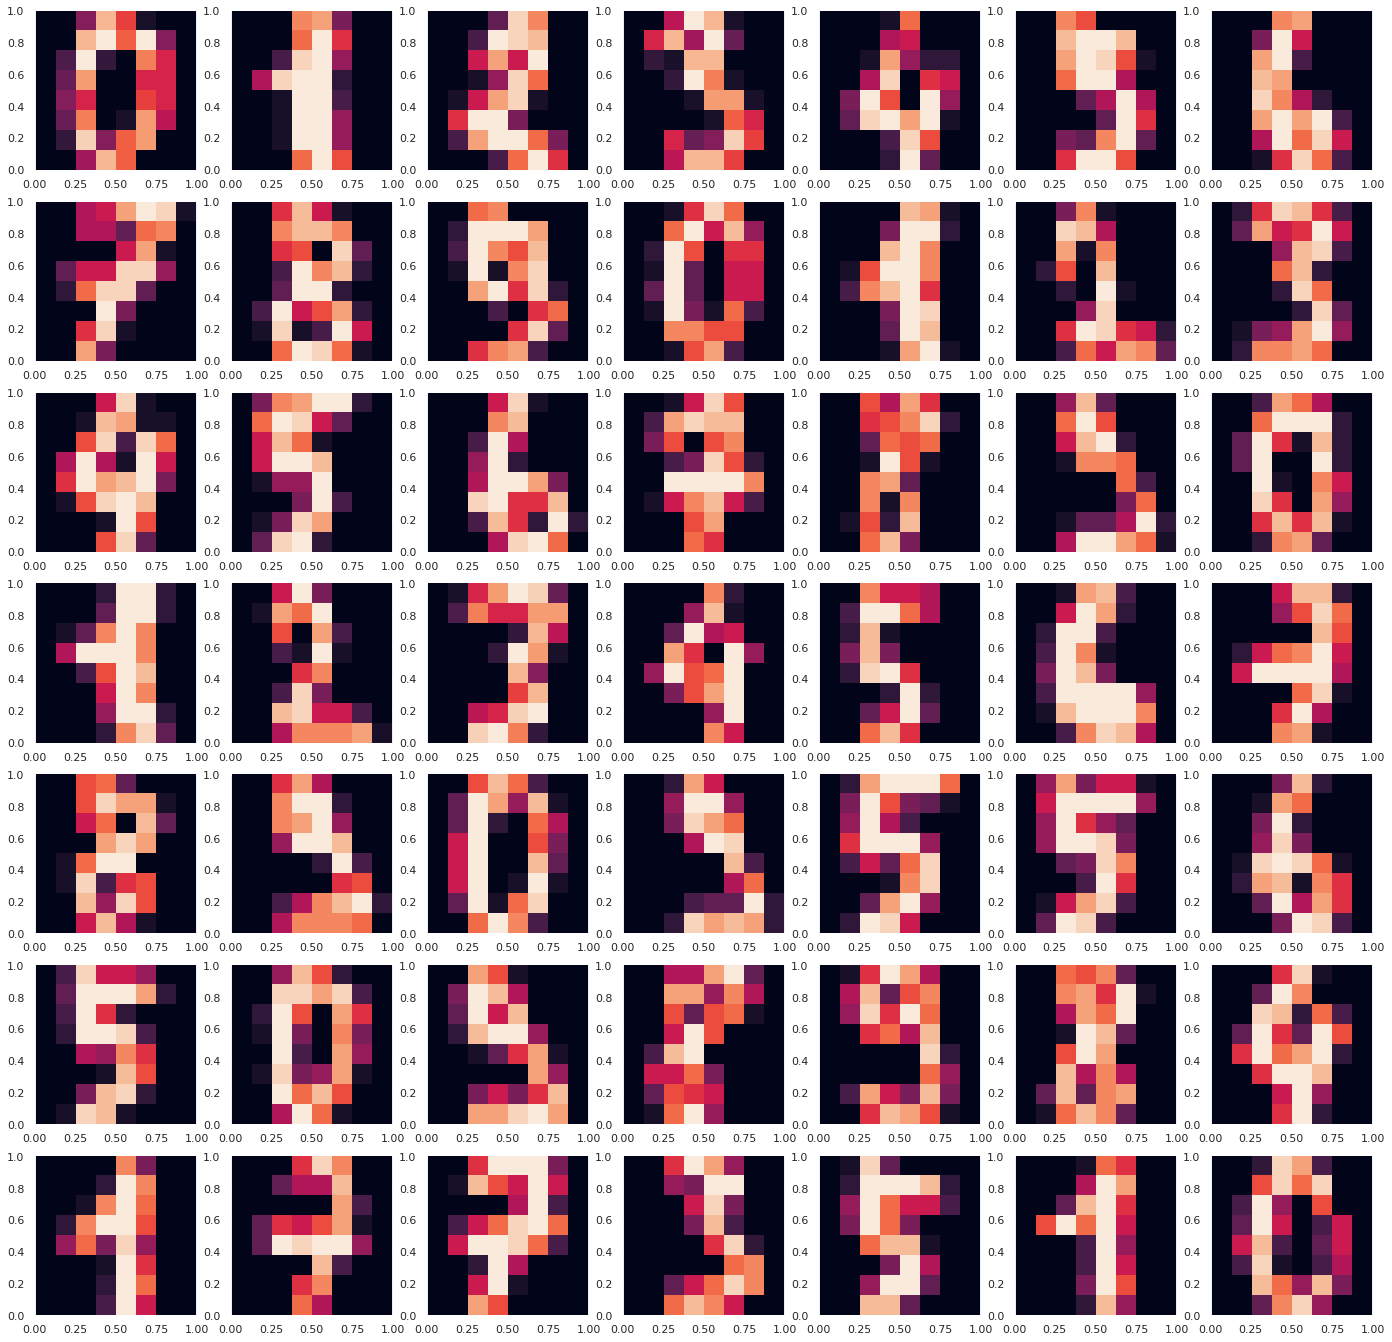

In [ ]:
nx, ny = 7, 7
fig, axs = plt.subplots(nx, ny, figsize=(24, 24))
for i in range(1,nx*ny+1):
    image=digits_dict['images'][i-1] 
    fig.add_subplot(nx, ny, i)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## El Regresor Lineal

```
# This is formatted as code
```



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [ ]:
X = digits.drop(columns="target").values
y = digits["target"].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

print(f'numero de filas train set: {len(X_train)}')
print(f'numero de filas test set: {len(X_test)}')

numero de filas train set: 1203
numero de filas test set: 594


In [ ]:
#Modelo de Regresión logística usando GridsearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

#Selección de hiperparámetros
params_logreg = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }

logreg_model = LogisticRegression()

logreg_gridsearchcv = GridSearchCV(estimator = logreg_model, param_grid = params_logreg, cv = 10)

start_time = time.time()

logreg_grid_result = logreg_gridsearchcv.fit(X_train, y_train)


print("--- %s segundos ---" % (time.time() - start_time))

print("Mejor: %f usando %s" % (logreg_grid_result.best_score_, logreg_grid_result.best_params_))

y_pred = logreg_gridsearchcv.predict(X_test)
summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_pred}))

--- 50.72746992111206 segundos ---
Mejor: 0.968423 usando {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


,accuracy,recall,precision,fscore
0,0.9411,0.9402,0.9397,0.9396


In [ ]:
from sklearn.metrics import confusion_matrix

print('Matriz de confusion:')
pd.DataFrame(data=confusion_matrix(y_test,y_pred))

Matriz de confusion:


,0,1,2,3,4,5,6,7,8,9
0,61,0,0,0,0,0,0,0,0,0
1,0,55,0,1,0,0,1,0,3,1
2,0,0,55,0,0,0,0,0,0,0
3,0,0,0,62,0,2,0,2,1,1
4,0,1,0,0,55,0,0,0,0,3
5,1,1,0,0,0,59,0,0,0,2
6,0,0,0,0,0,1,65,0,1,0
7,0,0,0,0,0,0,0,56,0,1
8,0,5,0,1,0,1,0,0,45,0
9,1,0,0,1,0,0,0,1,2,46


## Principal Component Analysis en el Regresor Lineal

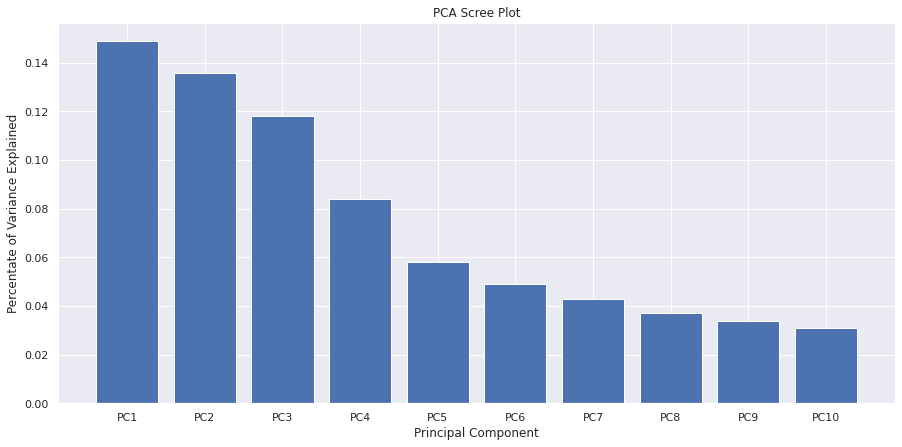

In [ ]:
pca = PCA(n_components=10) #Modelo, se tomarán 10 n-componentes, es decir, se tomarán 10 variables para reducir la dimensión
principalComponents = pca.fit_transform(X) 

#Varianzas por n-componentes
percent_variance = np.round(pca.explained_variance_ratio_, decimals =3)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

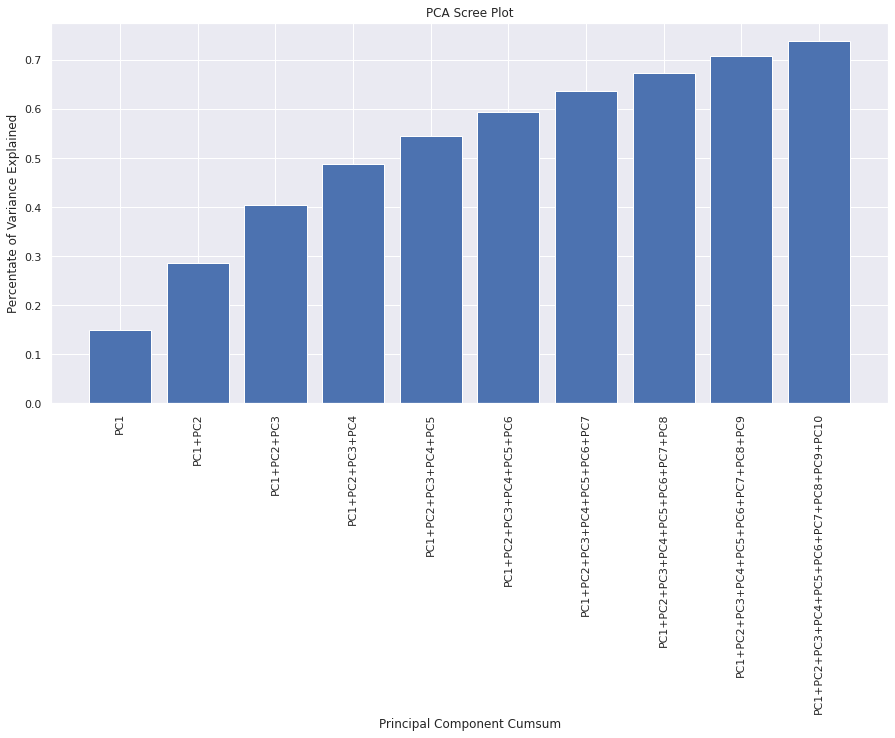

In [ ]:
# Gráfico de Varianza acumulada entre las n-componentes
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 
           'PC1+PC2', 
           'PC1+PC2+PC3', 
           'PC1+PC2+PC3+PC4', 
           'PC1+PC2+PC3+PC4+PC5', 
           'PC1+PC2+PC3+PC4+PC5+PC6',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.xticks(x= range(1,11), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
#Veamos cuanto es el valor del acumulado al final
percent_variance_cum[9]

0.7390000000000002

In [ ]:
pca2 = PCA(n_components=15) #Modelo, se tomarán 15 n-componentes, es decir, se tomarán 10 variables para reducir la dimensión
principalComponents2 = pca2.fit_transform(X) 

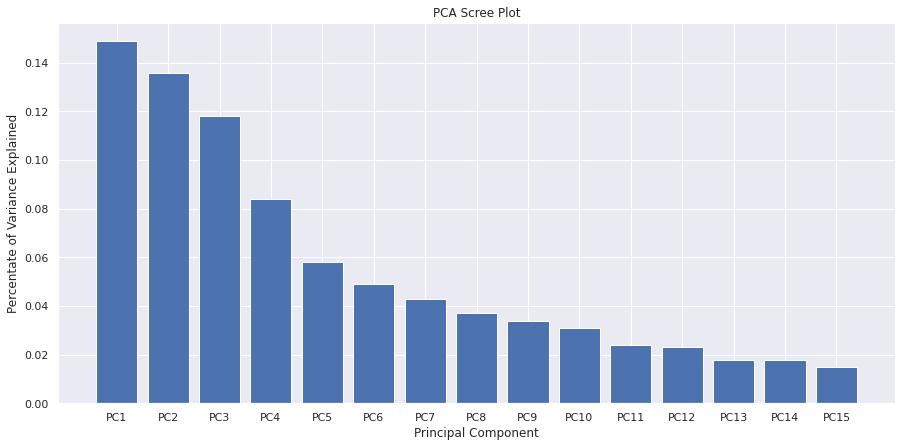

In [ ]:
#Varianzas por n-componentes
percent_variance2 = np.round(pca2.explained_variance_ratio_, decimals =3)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,16), height=percent_variance2, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

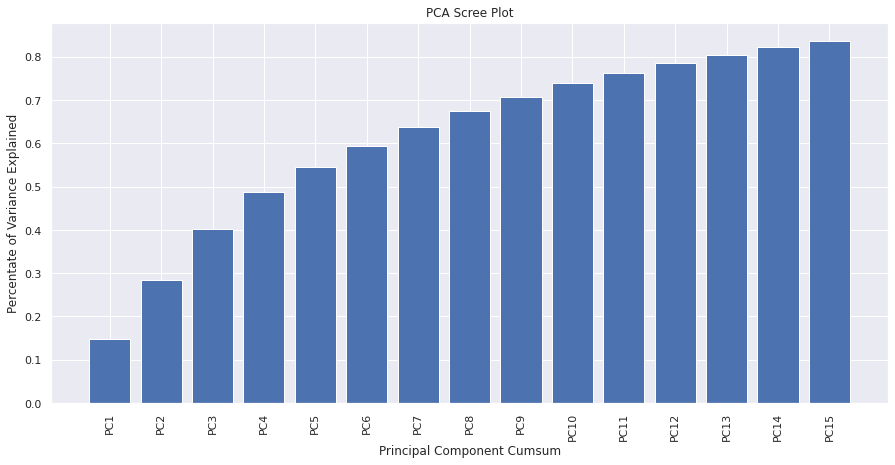

In [ ]:
percent_variance_cum2 = np.cumsum(percent_variance2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15']

plt.figure(figsize=(15,7))
plt.bar(x= range(1,16), height=percent_variance_cum2, tick_label=columns)
plt.xticks(x= range(1,16), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
percent_variance_cum2[14]

0.8370000000000003

In [ ]:
df_reduced = pd.DataFrame(data = principalComponents2, 
                                  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15'])
targetDataframe = digits_dict["target"]
df_reduced["target"] = targetDataframe
df_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,target
0,-1.259465,21.274871,-9.463060,13.014186,-7.128330,-7.440780,3.251781,2.554335,-0.581191,3.623039,2.582844,1.541964,0.793697,-3.359656,5.882778,0
1,7.957614,-20.768701,4.439497,-14.893584,5.896611,-6.486713,2.124330,-4.614370,3.589388,-1.081405,-5.385023,-2.133617,-2.613870,-6.555528,-2.368496,1
2,6.991919,-9.955983,2.958558,-12.288317,-18.126030,-4.507600,1.843630,-16.415534,0.720412,4.260898,-1.236735,-0.364285,0.204099,6.893350,-1.618999,2
3,-15.906123,3.332480,9.824369,-12.275887,6.965012,1.090033,-1.039685,10.972385,-3.257792,6.515436,-5.076759,2.450952,2.663425,-4.424727,0.906612,3
4,23.306879,4.269043,-5.675111,-13.851598,-0.358183,-2.857003,-0.720793,13.040194,-3.840505,13.408955,2.684941,-1.802297,-5.241265,1.485486,-0.661144,4


In [ ]:
#Se utilizan las componentes proyectadas
X = df_reduced[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13','PC14','PC15']]
Y = df_reduced['target']

#Se crean los conjuntos de entrenamiento y test desde los conjuntos definidos anteriormente
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

In [ ]:
#Modelo de Regresión logística usando GridsearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

#Selección de hiperparámetros
params_logreg = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }

logreg_model = LogisticRegression()

logreg_gridsearchcv = GridSearchCV(estimator = logreg_model, param_grid = params_logreg, cv = 10)

start_time = time.time()

logreg_grid_result = logreg_gridsearchcv.fit(X_train, Y_train)


print("--- %s segundos ---" % (time.time() - start_time))

print("Mejor: %f usando %s" % (logreg_grid_result.best_score_, logreg_grid_result.best_params_))

Y_pred = logreg_gridsearchcv.predict(X_test)
summary_metrics(pd.DataFrame(data={'y':Y_test, 'yhat':Y_pred}))

--- 21.56239914894104 segundos ---
Mejor: 0.950124 usando {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


,accuracy,recall,precision,fscore
0,0.9175,0.917,0.916,0.9158


In [ ]:
from sklearn.metrics import confusion_matrix

print('Matriz de confusion:')
pd.DataFrame(data=confusion_matrix(Y_test,Y_pred))

Matriz de confusion:


,0,1,2,3,4,5,6,7,8,9
0,60,0,0,0,1,0,0,0,0,0
1,0,50,0,1,0,0,2,0,3,5
2,0,0,55,0,0,0,0,0,0,0
3,0,2,1,59,0,1,0,4,0,1
4,0,0,0,0,54,0,0,0,1,4
5,0,0,0,1,1,60,0,0,1,0
6,0,1,0,0,0,1,64,0,1,0
7,0,0,1,0,0,0,0,54,1,1
8,0,4,0,1,0,1,2,0,43,1
9,0,0,0,2,0,2,0,0,1,46


## Comparación

In [ ]:
pd.concat([summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_pred})),summary_metrics(pd.DataFrame(data={'y':Y_test, 'yhat':Y_pred}))], keys=['LinReg model', 'LinReg model + PCA'])

,,accuracy,recall,precision,fscore
LinReg model,0,0.9411,0.9402,0.9397,0.9396
LinReg model + PCA,0,0.9175,0.9170,0.9160,0.9158


# Problema 3

Se ha creado un conjunto de datos sintéticos usando `make_regression` de `sklearn`.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

from numpy import linalg
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples=5000, n_features=100, n_informative=150, shuffle=False, random_state=0)

#Se normaliza con LabelEncoder
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
y = encoded

data = pd.DataFrame(X)
data['target'] = y
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,target
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357,-0.103219,0.410599,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,1.230291,1.202380,-0.387327,-0.302303,...,-0.359553,-0.813146,-1.726283,0.177426,-0.401781,-1.630198,0.462782,-0.907298,0.051945,0.729091,0.128983,1.139401,-1.234826,0.402342,-0.684810,-0.870797,-0.578850,-0.311553,0.056165,-1.165150,0.900826,0.465662,-1.536244,1.488252,1.895889,1.178780,-0.179925,-1.070753,1.054452,-0.403177,1.222445,0.208275,0.976639,0.356366,0.706573,0.010500,1.785870,0.126912,0.401989,3385
1,1.883151,-1.347759,-1.270485,0.969397,-1.173123,1.943621,-0.413619,-0.747455,1.922942,1.480515,1.867559,0.906045,-0.861226,1.910065,-0.268003,0.802456,0.947252,-0.155010,0.614079,0.922207,0.376426,-1.099401,0.298238,1.326386,-0.694568,-0.149635,-0.435154,1.849264,0.672295,0.407462,-0.769916,0.539249,-0.674333,0.031831,-0.635846,0.676433,0.576591,-0.208299,0.396007,-1.093062,...,1.929532,0.949421,0.087551,-1.225436,0.844363,-1.000215,-1.544771,1.188030,0.316943,0.920859,0.318728,0.856831,-0.651026,-1.034243,0.681595,-0.803410,-0.689550,-0.455533,0.017479,-0.353994,-1.374951,-0.643618,-2.223403,0.625231,-1.602058,-1.104383,0.052165,-0.739563,1.543015,-1.292857,0.267051,-0.039283,-1.168093,0.523277,-0.171546,0.771791,0.823504,2.163236,1.336528,4363
2,-0.369182,-0.239379,1.099660,0.655264,0.640132,-1.616956,-0.024326,-0.738031,0.279925,-0.098150,0.910179,0.317218,0.786328,-0.466419,-0.944446,-0.410050,-0.017020,0.379152,2.259309,-0.042257,-0.955945,-0.345982,-0.463596,0.481481,-1.540797,0.063262,0.156507,0.232181,-0.597316,-0.237922,-1.424061,-0.493320,-0.542861,0.416050,-1.156182,0.781198,1.494485,-2.069985,0.426259,0.676908,...,-0.506816,-0.596314,-0.052567,-1.936280,0.188779,0.523891,0.088422,-0.310886,0.097400,0.399046,-2.772593,1.955912,0.390093,-0.652409,-0.390953,0.493742,-0.116104,-2.030684,2.064493,-0.110541,1.020173,-0.692050,1.536377,0.286344,0.608844,-1.045253,1.211145,0.689818,1.301846,-0.628088,-0.481027,2.303917,-1.060016,-0.135950,1.136891,0.097725,0.582954,-0.399449,0.370056,260
3,-1.306527,1.658131,-0.118164,-0.680178,0.666383,-0.460720,-1.334258,-1.346718,0.693773,-0.159573,-0.133702,1.077744,-1.126826,-0.730678,-0.384880,0.094352,-0.042171,-0.286887,-0.061626,-0.107305,-0.719604,-0.812993,0.274516,-0.890915,-1.157355,-0.312292,-0.157667,2.256723,-0.704700,0.943261,0.747188,-1.188945,0.773253,-1.183881,-2.659172,0.606320,-1.755891,0.450934,-0.684011,1.659551,...,0.003771,0.931848,0.339965,-0.015682,0.160928,-0.190653,-0.394850,-0.267734,-1.128011,0.280442,-0.993124,0.841631,-0.249459,0.049495,0.493837,0.643314,-1.570623,-0.206904,0.880179,-1.698106,0.387280,-2.255564,-1.022507,0.038631,-1.656715,-0.985511,-1.471835,1.648135,0.164228,0.567290,-0.222675,-0.353432,-1.616474,-0.291837,-0.761492,0.857924,1.141102,1.466579,0.852552,289
4,-0.598654,-1.115897,0.766663,0.356293,-1.768538,0.355482,0.814520,0.058926,-0.185054,-0.807648,-1.446535,0.800298,-0.309114,-0.233467,1.732721,0.684501,0.370825,0.142062,1.519995,1.719589,0.929505,0.582225,-2.094603,0.123722,-0.130107,0.093953,0.943046,-2.739677,-0.569312,0.269904,-0.466846,-1.416906,0.868963,0.276872,-0.971105,0.314817,0.821586,0.005293,0.800565,0.078260,...,-0.978830,-0.439190,0.181338,-0.502817,2.412454,-0.960504,-0.793117,-2.288620,0.251484,-2.016407,-0.539455,-0.275671,-0.709728,1.738873,0.994394,1.319137,-0.882419,1.128594,0.496001,0.771406,1.029439,-0.908763,-0.424318,0.862596,-2.655619,1.513328,0.553132,-0.045704,0.220508,-1.029935,-0.349943,1.100284,1.298022,2.696224,-0.073925,-0.65855

## El Regresor Lineal

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['accuracy'] = [round(accuracy_score(y_true,y_pred),4)]
    df_result['recall'] = [round(recall_score(y_true,y_pred, average="macro"),4)]
    df_result['precision'] = [round(precision_score(y_true,y_pred, average="macro"),4)]
    df_result['fscore'] = [round(f1_score(y_true,y_pred, average="macro"),4)]


    return df_result

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(f'numero de filas train set: {len(X_train)}')
print(f'numero de filas test set: {len(X_test)}')

numero de filas train set: 3350
numero de filas test set: 1650


In [ ]:
#Modelo de Regresión logística
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression().fit(X,y)

y_pred = logreg_model.predict(X_test)
summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_pred}))

,accuracy,recall,precision,fscore
0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.metrics import confusion_matrix

print('Matriz de confusion:')
pd.DataFrame(data=confusion_matrix(y_test,y_pred))

Matriz de confusion:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Principal Component Analysis en el Regresor Lineal

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X)

l = []
for i in range(50):
  uwu = 'PC'+str(i+1)
  l.append(uwu)

principalDataframe = pd.DataFrame(data = principalComponents, columns = l)

df_reducido = pd.concat([principalDataframe, pd.DataFrame(y)],axis = 1)

df_reducido = df_reducido.rename(columns={0: "target"})
df_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,target
0,1.444848,1.207499,1.489532,0.329698,-0.672619,-1.415615,-0.307789,-0.046011,0.945921,0.353068,-1.456679,-0.221956,-0.195192,1.241092,-1.402480,0.360434,-0.565181,1.502792,2.007834,1.119643,0.492817,-0.378235,0.080838,-0.860509,-0.387134,0.979030,-1.735434,-0.075550,0.103322,-2.776902,-0.588781,-0.613104,-1.711548,0.132568,-1.114350,-1.676066,0.052629,0.202606,-1.367920,-0.561233,-1.085977,-2.421262,0.954353,0.103265,0.625337,0.792335,0.599141,-2.668650,-0.655035,0.378122,3385
1,1.398493,0.615079,1.319397,1.570432,-0.845931,0.547252,0.825010,0.432835,0.461015,-2.145128,-1.530366,-0.721246,0.855479,-0.888637,-1.744525,-0.211035,1.762819,-0.505759,2.265365,-2.567836,1.035634,0.825187,0.455626,0.860794,-0.912406,1.641792,0.049397,1.671255,-0.031176,-0.580855,0.181845,1.524053,-0.823254,1.377860,-0.800659,-0.229042,0.180502,-0.032515,1.733486,-0.041144,0.046721,0.560917,0.950941,-0.357130,-1.284660,1.108608,-0.453639,-0.330250,0.506943,-0.980592,4363
2,-0.112138,-0.320330,-0.459847,-0.422599,-0.270588,1.080201,-2.300806,1.499277,-0.833231,0.927447,-0.927098,-0.207610,-0.599809,1.017557,0.673312,0.508297,-1.864996,0.245135,1.321485,-1.239134,-0.345873,0.542867,0.166112,-2.238783,0.677067,0.492580,-0.000383,-1.328239,-2.072596,-1.005583,0.655550,0.104641,0.207528,2.594345,-0.770831,-1.747970,1.032131,0.998246,-0.497376,-0.121196,1.073341,0.585262,0.757901,-1.391034,0.068141,0.391276,-1.442550,-0.207230,0.840604,-0.094352,260
3,-0.896404,-0.451308,-1.231672,0.845328,0.170265,1.269816,-0.009753,0.429969,1.025082,0.641471,-2.495700,0.568798,2.175559,-1.769043,-1.550104,1.050678,0.311888,-0.451470,0.367557,-0.369568,-0.358421,-0.379666,0.403965,0.636100,-0.437140,0.079067,1.097339,-2.441661,-0.810767,-0.105329,0.191636,-0.753223,-2.069854,-0.507405,-1.440112,2.083616,-0.006871,-0.831962,0.030328,0.167937,-0.265410,0.432702,0.983101,0.706164,-0.945405,0.092891,-1.060625,-0.676473,-0.366624,0.146119,289
4,0.019979,1.509391,0.730362,-2.162885,-0.699138,0.075718,-2.499619,-0.341435,-1.445224,-0.707550,-2.002437,0.638025,-0.675110,1.330288,0.951523,1.944427,1.954634,-1.009189,-0.470853,-0.242965,-0.993088,-1.344248,0.744063,-0.469046,0.718752,-0.081505,0.467917,-0.956051,0.859945,-0.457362,-1.804203,-1.688546,0.012945,-1.180749,0.361480,-0.164818,-0.331560,-0.702213,0.892106,0.645531,0.186668,-0.925715,-0.341670,-0.653162,0.330215,-0.449803,-1.241482,0.520960,-1.688250,-2.211816,1908


In [ ]:
#Se utilizan las componentes proyectadas
from sklearn import preprocessing
from sklearn import utils

X = df_reducido[l]
Y = df_reducido['target']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y)
Y = encoded

#Se crean los conjuntos de entrenamiento y test desde los conjuntos definidos anteriormente
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 0)

In [ ]:
#Modelo de Regresión logística
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=0).fit(X, Y)

Y_pred = logreg_model.predict(X_test)
summary_metrics(pd.DataFrame(data={'y':Y_test, 'yhat':Y_pred}))

,accuracy,recall,precision,fscore
0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.metrics import confusion_matrix

print('Matriz de confusion:')
pd.DataFrame(data=confusion_matrix(Y_test,Y_pred))

Matriz de confusion:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Comparación

In [ ]:
pd.concat([summary_metrics(pd.DataFrame(data={'y':y_test, 'yhat':y_pred})),summary_metrics(pd.DataFrame(data={'y':Y_test, 'yhat':Y_pred}))], keys=['LinReg model', 'LinReg model + PCA'])

,,accuracy,recall,precision,fscore
LinReg model,0,1.0,1.0,1.0,1.0
LinReg model + PCA,0,1.0,1.0,1.0,1.0
